### 나만의 모델 만들고 검증하기

In [3]:
import os
print(os.getcwd())

C:\Users\toto\Documents\Github\MachineLearning_Basic_Class\class_code


### 학습내용
 * 다양한 데이터 셋 교차 검증 실시해 보기
    * https://www.kaggle.com/varpit94/world-population-density

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
dat = pd.read_csv("./data/csvData.csv")

In [7]:
dat.head()

,rank,country,density,densityMi,pop2021,area
0,1,Macau,21946.4667,56841.3487,658.394,30
1,2,Monaco,19755.5000,51166.7450,39.511,2
2,3,Singapore,8305.1915,21510.4461,5896.686,710
3,4,Hong Kong,6841.3134,17719.0017,7552.810,1104
4,5,Gibraltar,5616.3333,14546.3033,33.698,6


<AxesSubplot:xlabel='density', ylabel='Count'>

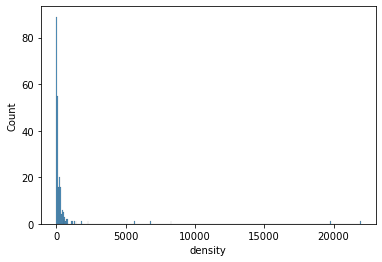

In [13]:
sns.histplot(x="density", data=dat)

In [14]:
dat.columns

Index(['rank', 'country', 'density', 'densityMi', 'pop2021', 'area'], dtype='object')

In [15]:
X = dat[ ['densityMi', 'pop2021', 'area'] ]
y = dat[ 'density' ]

X_train, X_test, y_train, y_test = train_test_split(X, y)
knn = KNeighborsClassifier()

### 데이터 셋
 * https://www.kaggle.com/fedesoriano/heart-failure-prediction
 * heart.csv 


In [78]:
dat = pd.read_csv("./data/heart.csv")

In [79]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [80]:
dat.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [81]:
X = dat[ ['RestingBP', 'MaxHR', 'Oldpeak'] ]
y = dat[ 'HeartDisease' ]  # 0, 1 

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(knn, X_test, y_test, cv=kfold)
scores

array([0.58695652, 0.63043478, 0.65217391, 0.65217391, 0.56521739])

### 데이터 셋 
 * https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021
 * spotify_dataset.csv

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
dat = pd.read_csv("./data/spotify_dataset.csv")
print(dat.shape)
dat.head(3)

(1556, 23)


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A


In [97]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [98]:
dat[ 'Highest Charting Position' ].unique()

array([  1,   2,   3,   5,   8,   4,   9,   7,  14,  20,  19,  22,  24,
        12,  27,  18,  15,  32,  11,  10,  36,  39,  41,  17,  33,  46,
        48,  29,  52,  40,  56,  57,  31,  34,  26,  35,  69,  71,  72,
        74,  75,   6,  83,  76,  42,  78,  89,  23,  55,  94,  96,  97,
        60,  99,  85, 103,  88,  45,  59, 109, 110, 113,  80, 116,  13,
       126, 122, 128, 131, 135, 108, 138, 141,  81,  25,  90, 100, 147,
       121, 153, 154, 142,  68, 120, 155, 144,  65, 149, 181, 183, 184,
       191,  64, 194, 197,  58, 199, 172,  66,  87, 127, 129, 150, 159,
       105, 180, 175, 193,  79,  28, 164, 169, 187,  95, 101, 132, 152,
       189, 136, 117,  43,  47,  63,  73,  82, 165,  50, 176, 179, 146,
       112, 170, 133, 119, 161,  84, 106, 124, 166,  54, 195, 134,  21,
       200,  53, 118,  67, 137,  91, 198,  30,  92, 148, 182,  77,  38,
        61, 115,  37,  62, 177, 107, 186, 104,  51,  93, 102, 114, 139,
       192, 160, 140, 188,  49,  44, 168,  86, 157, 123, 158, 18

In [99]:
dat[ dat['Tempo'] == ' '].head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,...,,,,,,,,,,
163,164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,...,,,,,,,,,,
464,465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,...,,,,,,,,,,


In [100]:
dat.loc[dat['Tempo']==' ',  'Tempo'] = 0
dat.loc[dat['Artist Followers']==' ',  'Artist Followers'] = 0
dat.loc[dat['Danceability']==' ',  'Danceability'] = 0
dat.loc[dat['Energy']==' ',  'Energy'] = 0

In [101]:
dat['Number of Times Charted'] = dat['Number of Times Charted'].astype("float32")
dat['Artist Followers'] = dat['Artist Followers'].astype("float32")
dat['Danceability'] = dat['Danceability'].astype("float32")
dat['Energy'] = dat['Energy'].astype("float32")
dat['Tempo'] = dat['Tempo'].astype("float32")

In [102]:
X = dat[ ['Number of Times Charted', 'Artist Followers', 
          'Danceability', 'Energy', 'Tempo'] ]
y = dat[ 'Highest Charting Position' ]

X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
from sklearn.model_selection import cross_val_score, KFold

rf.fit(X_train, y_train)
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(rf, X_test, y_test, cv=kfold)
scores

array([0.        , 0.        , 0.02564103, 0.        , 0.01298701])